# **Phase 1**

## **1: Problem Statement**

### **1.1.1 Problem Statement**
This project’s goal is to make a detailed analysis on why road accidents are occurring a lot and in what trend, will be helpful in improving road safety measures & make the policy options which can reduce the number of accidents. This research would help to know the impacts of accident severity on the driver attributes, vehicle conditions, surface conditions and environmental conditions.

### **1.1.2 Potential Contribution & Importance**
Road accidents pose a threat to health globally by resulting in significant fatalities and injuries of individuals worldwide. This evaluation plays a role in finding factors that play a vital role in accident prevention. The evidence of this review may support the implementation of measures of safety, improvement of driver education programs, and modification of road systems that can reduce accidents and save lives.

## **2: Ask Questions**

### Bhuvan Thirwani:

#### Question 1:

#### Question 2:

#### Harshit Malpani: 50608809

#### Question 1:
What vehicles should the authorities focus more on to reduce the cases of road accidents and the severity of the road accidents

#### Question 2:
Does the service period of the vehicle and ownership of the vehicle have any correlation with the accidents

#### Piyush Gulhane:

#### Question 1:
What is the Impact of area, type of road cross-section, type of roads and road alignment on  different types of Accidents


*   This analysis will help us identify accident prone areas, common mistakes in road infrastructure, alignment and help us identify potential dark spots. It will help in future planning for Roads construction to avoid such road engineering mistakes like installing traffic signals, gradient of road, signboards, etc.

*   Many a times slope of road, busy cross sections and other factors has influence on the accident, to identify and rectify these factors help in reduction of accidents.



#### Question 2:
 What is the impact of Environmental factors, Light(visibility) impact, Road surface, time of the day, etc.
*   This analysis will  help us understand conditions/situations which forced human error, Most of time unavailability of light, less visibility, heavy rain can increase probability of accident. Appropriate changes in vehicle engineering and roads can help reduce casualties.
*   It is significant to identify conditions which affect driving experience.


## **3: Data Retrieval**

The dataset has been taken from KAGGLE. For this task, we have uploaded a copy of the dataset to a github repository and downloading the data from the github repository directly to the dataframe

In [120]:
import pandas as pd

dataset = pd.read_csv('https://raw.githubusercontent.com/hmalpani/RTA-Dataset/main/RTA_Dataset.csv')

In [121]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Time                         12316 non-null  object
 1   Day_of_week                  12316 non-null  object
 2   Age_band_of_driver           12316 non-null  object
 3   Sex_of_driver                12316 non-null  object
 4   Educational_level            11575 non-null  object
 5   Vehicle_driver_relation      11737 non-null  object
 6   Driving_experience           11487 non-null  object
 7   Type_of_vehicle              11366 non-null  object
 8   Owner_of_vehicle             11834 non-null  object
 9   Service_year_of_vehicle      8388 non-null   object
 10  Defect_of_vehicle            7889 non-null   object
 11  Area_accident_occured        12077 non-null  object
 12  Lanes_or_Medians             11931 non-null  object
 13  Road_allignment              12

In [122]:
dataset.head()

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
0,17:02:00,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Moving Backward,Slight Injury
1,17:02:00,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
2,17:02:00,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,NaN,...,Going straight,Driver or rider,Male,31-50,3,Driver,NaN,Not a Pedestrian,Changing lane to the left,Serious Injury
3,1:06:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,NaN,...,Going straight,Pedestrian,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury
4,1:06:00,Sunday,18-30,Male,Junior high school,Employee,2-5yr,NaN,Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury


## **4: Data Cleaning**

### 1) Remove Duplicate Values:
Removing duplicate values is an essential step of data cleaning for any data science project. It helps in reducing the bias where certain data points are represented multiple times. If the duplicate values are not removed, it can skew the results and therefore lead to incorrect conclusions

In [123]:
# Remove duplicates
cleaned_dataset = dataset.drop_duplicates()

### 2) Validation

In [124]:
# Remove entries with 'Number_of_vehicles_involved' = 0
cleaned_dataset = cleaned_dataset[cleaned_dataset['Number_of_vehicles_involved'] != 0]

### 3) Detection and Removal of Outliers

In [125]:
# code for outliers handling

numerical_columns = ['Number_of_vehicles_involved', 'Number_of_casualties']
for column in numerical_columns:
    if not pd.api.types.is_numeric_dtype(cleaned_dataset[column]):
        print(f"Column '{column}' should be numeric but contains non-numeric data.")

def detect_outliers(column):
    Q1 = cleaned_dataset[column].quantile(0.05)
    Q3 = cleaned_dataset[column].quantile(0.95)
    IQR = Q3 - Q1
    outliers = cleaned_dataset[(cleaned_dataset[column] < (Q1 - 1.5 * IQR)) | (cleaned_dataset[column] > (Q3 + 1.5 * IQR))]
    return outliers

for column in numerical_columns:
    outliers = detect_outliers(column)
    if not outliers.empty:
        print(f"Outliers detected in column '{column}':\n", outliers.shape)

def remove_outliers(df, column):
    Q1 = cleaned_dataset[column].quantile(0.05)
    Q3 = cleaned_dataset[column].quantile(0.95)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return cleaned_dataset[(cleaned_dataset[column] >= lower_bound) & (cleaned_dataset[column] <= upper_bound)]

print("Shape before removing outliers:", cleaned_dataset.shape)
# Remove outliers from both columns
cleaned_dataset = remove_outliers(cleaned_dataset, 'Number_of_vehicles_involved')
cleaned_dataset = remove_outliers(cleaned_dataset, 'Number_of_casualties')

# Check the shape of the DataFrame after removal
print("Shape after removing outliers:", cleaned_dataset.shape)

Outliers detected in column 'Number_of_vehicles_involved':
 (7, 32)
Shape before removing outliers: (12316, 32)
Shape after removing outliers: (12309, 32)


### 4) Handling Missing Values:
In this step of Data Cleaning, we either remove or impute the missing values in the dataset

In [126]:
# Find the number of missing values
missing_value_count = cleaned_dataset.isnull().sum()
missing_value_count

,0
Time,0
Day_of_week,0
Age_band_of_driver,0
Sex_of_driver,0
Educational_level,741
Vehicle_driver_relation,579
Driving_experience,829
Type_of_vehicle,950
Owner_of_vehicle,482
Service_year_of_vehicle,3923


In [127]:
dataset_columns = cleaned_dataset.columns.tolist()
missing_values_columns = missing_value_count[missing_value_count > 0].index.tolist()
print(missing_values_columns)

['Educational_level', 'Vehicle_driver_relation', 'Driving_experience', 'Type_of_vehicle', 'Owner_of_vehicle', 'Service_year_of_vehicle', 'Defect_of_vehicle', 'Area_accident_occured', 'Lanes_or_Medians', 'Road_allignment', 'Types_of_Junction', 'Road_surface_type', 'Type_of_collision', 'Vehicle_movement', 'Work_of_casuality', 'Fitness_of_casuality']


In [128]:
# Replace missing values
cleaned_dataset['Educational_level'].fillna(cleaned_dataset['Educational_level'].mode()[0], inplace=True)
cleaned_dataset['Vehicle_driver_relation'].fillna('Unknown', inplace=True)
cleaned_dataset['Driving_experience'].fillna(cleaned_dataset['Driving_experience'].mode()[0], inplace=True)
cleaned_dataset['Type_of_vehicle'].fillna('Unknown', inplace=True)
cleaned_dataset['Owner_of_vehicle'].fillna('Unknown', inplace=True)
cleaned_dataset['Service_year_of_vehicle'].fillna('Unknown', inplace=True)
cleaned_dataset['Defect_of_vehicle'].fillna('No defect', inplace=True)
cleaned_dataset['Area_accident_occured'].fillna('Unknown', inplace=True)
cleaned_dataset['Lanes_or_Medians'].fillna('Unknown', inplace=True)
cleaned_dataset['Road_allignment'].fillna('Unknown', inplace=True)
cleaned_dataset['Types_of_Junction'].fillna('Unknown', inplace=True)
cleaned_dataset['Road_surface_type'].fillna('Unknown', inplace=True)
cleaned_dataset['Type_of_collision'].fillna('Unknown', inplace=True)
cleaned_dataset['Vehicle_movement'].fillna('Unknown', inplace=True)
cleaned_dataset['Work_of_casuality'].fillna('Unknown', inplace=True)
cleaned_dataset['Fitness_of_casuality'].fillna('Unknown', inplace=True)

<ipython-input-128-5dd3a9061be5>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  cleaned_dataset['Educational_level'].fillna(cleaned_dataset['Educational_level'].mode()[0], inplace=True)
<ipython-input-128-5dd3a9061be5>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example,

### 5) Correcting Errors:
In this data cleaning, we identify and fix the errors or incosistencies present in the data

In [129]:
cleaned_dataset['Type_of_vehicle'] = cleaned_dataset['Type_of_vehicle'].replace('Lorry (41?100Q)', 'Lorry (41 - 100 Q)')
cleaned_dataset['Type_of_vehicle'] = cleaned_dataset['Type_of_vehicle'].replace('Lorry (11?40Q)', 'Lorry (11 - 40 Q)')
cleaned_dataset['Type_of_vehicle'] = cleaned_dataset['Type_of_vehicle'].replace('Public (13?45 seats)', 'Public (13 - 45 seats)')
cleaned_dataset['Area_accident_occured'] = cleaned_dataset['Area_accident_occured'].replace('  Recreational areas', 'Recreational areas')
cleaned_dataset['Area_accident_occured'] = cleaned_dataset['Area_accident_occured'].replace('  Market areas', 'Market areas')
cleaned_dataset['Area_accident_occured'] = cleaned_dataset['Area_accident_occured'].replace(' Church areas', 'Church areas')
cleaned_dataset['Area_accident_occured'] = cleaned_dataset['Area_accident_occured'].replace(' Hospital areas', 'Hospital areas')
cleaned_dataset['Area_accident_occured'] = cleaned_dataset['Area_accident_occured'].replace(' Industrial areas', 'Industrial areas')
cleaned_dataset['Area_accident_occured'] = cleaned_dataset['Area_accident_occured'].replace(' Outside rural areas', 'Outside rural areas')
cleaned_dataset['Area_accident_occured'] = cleaned_dataset['Area_accident_occured'].replace('Rural village areasOffice areas', 'Rural Office areas')
cleaned_dataset['Road_allignment'] = cleaned_dataset['Road_allignment'].replace('Tangent road with mountainous terrain and', 'Tangent road with mountainous terrain')
cleaned_dataset['Fitness_of_casuality'] = cleaned_dataset['Fitness_of_casuality'].replace('NormalNormal', 'Normal')
cleaned_dataset['Casualty_severity'] = cleaned_dataset['Casualty_severity'].replace('na', 'Unknown')

### 6) Standardize the Data
a) Convert all the entries in `Time` column to a consistent format.<br>
b) Convert `Over 51` to `51 and Over` in the `Age_band_of_driver` column

In [130]:
# Standardize the 'Time' column
cleaned_dataset['Time'] = pd.to_datetime(cleaned_dataset['Time'], format='%H:%M:%S').dt.time
# Make 'Over 51' to '51 and Over' for Driver Age band
cleaned_dataset['Age_band_of_driver'] = cleaned_dataset['Age_band_of_driver'].replace('Over 51', '51 and Over')

### 7) Parsing the data
Convert all the text in the dataset to lowercase to ensure consistency. This helps in avoiding the situations where same words with different cases are considered different

In [131]:
# Make all the characters to lowercase
cleaned_dataset = cleaned_dataset.map(lambda x: x.lower() if isinstance(x, str) else x)

### 8) Feature Engineering

In [132]:
print(cleaned_dataset['Time'].head())
cleaned_dataset['Hour'] = pd.to_datetime(cleaned_dataset['Time'], format='%H:%M:%S').dt.hour
Time_of_dat = ['Night', 'Morning', 'Noon', 'Evening']

def categorize_time_of_day(hour):
    if 5 <= hour < 12:
        return 2
    elif 12 <= hour < 17:
        return 3
    elif 17 <= hour < 21:
        return 4
    else:
        return 1


cleaned_dataset['Time_of_day'] = cleaned_dataset['Hour'].apply(categorize_time_of_day)

print("Data head after categorizing and encoding Time_of_day:\n")
cleaned_dataset[['Time', 'Hour', 'Time_of_day']].head()


0    17:02:00
1    17:02:00
2    17:02:00
3    01:06:00
4    01:06:00
Name: Time, dtype: object
Data head after categorizing and encoding Time_of_day:



,Time,Hour,Time_of_day
0,17:02:00,17,4
1,17:02:00,17,4
2,17:02:00,17,4
3,01:06:00,1,1
4,01:06:00,1,1


#### 9) Ordinal & One Hot Encoding

In [133]:
from sklearn.preprocessing import OneHotEncoder

encoding_dict = {
    'Day_of_week': 'ordinal',
    'Age_band_of_driver': 'ordinal',
    'Sex_of_driver': 'one_hot',
    'Educational_level': 'ordinal',
    'Vehicle_driver_relation': 'one_hot',
    'Driving_experience': 'ordinal',
    'Type_of_vehicle': 'one_hot',
    'Owner_of_vehicle': 'one_hot',
    'Service_year_of_vehicle': 'ordinal',
    'Defect_of_vehicle': 'one_hot',
    'Area_accident_occured': 'one_hot',
    'Lanes_or_Medians': 'one_hot',
    'Road_allignment': 'one_hot',
    'Types_of_Junction': 'one_hot',
    'Road_surface_type': 'one_hot',
    'Road_surface_conditions': 'ordinal',
    'Light_conditions': 'one_hot',
    'Weather_conditions': 'one_hot',
    'Type_of_collision': 'one_hot',
    'Vehicle_movement': 'one_hot',
    'Casualty_class': 'one_hot',
    'Sex_of_casualty': 'one_hot',
    'Age_band_of_casualty': 'ordinal',
    'Casualty_severity': 'ordinal',
    'Work_of_casuality': 'one_hot',
    'Fitness_of_casuality': 'one_hot',
    'Pedestrian_movement': 'one_hot',
    'Cause_of_accident': 'one_hot',
    'Accident_severity': 'ordinal'
}

ordinal_mappings = {
    'Day_of_week': {
        'Monday': 0, 'Tuesday': 1, 'Wednesday': 2, 'Thursday': 3,
        'Friday': 4, 'Saturday': 5, 'Sunday': 6, 'Unknown': -1
    },
    'Age_band_of_driver': {
        'Under 18': 0, '18-30': 1, '31-50': 2, 'Over 51': 3, 'Unknown': -1
    },
    'Educational_level': {
        'Illiterate': 0, 'Writing & reading': 1, 'Elementary school': 2,
        'Junior high school': 3, 'High school': 4, 'Above high school': 5,
        'Unknown': -1
    },
    'Driving_experience': {
        'No Licence': 0, 'Below 1yr': 1, '1-2yr': 2, '2-5yr': 3, '5-10yr': 4,
        'Above 10yr': 5, 'unknown': -1
    },
    'Service_year_of_vehicle': {
        'Below 1yr': 0, '1-2yr': 1, '2-5yrs': 2, '5-10yrs': 3,
        'Above 10yr': 4, 'Unknown': -1
    },
    'Road_surface_conditions': {
        'Dry': 0, 'Wet or damp': 1, 'Snow': 2, 'Flood over 3cm. deep': 3, 'Unknown': -1
    },
    'Age_band_of_casualty': {
        'Under 18': 0, '18-30': 1, '31-50': 2, 'Over 51': 3, '5': 4, 'na': -1, 'Unknown': -1
    },
    'Casualty_severity': {
        '3': 0, '2': 1, '1': 2, 'na': -1, 'Unknown': -1
    },
    'Accident_severity': {
        'Slight Injury': 0, 'Serious Injury': 1, 'Fatal injury': 2, 'Unknown': -1
    }
}

def apply_encoding(df, encoding_dict, ordinal_mappings):
    one_hot_encoder = OneHotEncoder(sparse_output=False, drop='first')

    for column, encoding_type in encoding_dict.items():
        if encoding_type == 'ordinal':
            # Apply ordinal encoding using a mapping dictionary
            if column in ordinal_mappings:
                df[f"{column}_ordinal"] = df[column].map(ordinal_mappings[column])
            else:
                print(f"No ordinal mapping provided for column: {column}")

        elif encoding_type == 'one_hot':
            one_hot_encoded_df = pd.get_dummies(df[column], prefix=column, drop_first=True)
            df = pd.concat([df, one_hot_encoded_df], axis=1)

        else:
            print(f"Unknown encoding type: {encoding_type} for column: {column}")

    return df

cleaned_dataset = apply_encoding(cleaned_dataset, encoding_dict, ordinal_mappings)

cleaned_dataset.head()

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Cause_of_accident_no priority to pedestrian,Cause_of_accident_no priority to vehicle,Cause_of_accident_other,Cause_of_accident_overloading,Cause_of_accident_overspeed,Cause_of_accident_overtaking,Cause_of_accident_overturning,Cause_of_accident_turnover,Cause_of_accident_unknown,Accident_severity_ordinal
0,17:02:00,monday,18-30,male,above high school,employee,1-2yr,automobile,owner,above 10yr,...,False,False,False,False,False,False,False,False,False,NaN
1,17:02:00,monday,31-50,male,junior high school,employee,above 10yr,public (> 45 seats),owner,5-10yrs,...,False,False,False,False,False,True,False,False,False,NaN
2,17:02:00,monday,18-30,male,junior high school,employee,1-2yr,lorry (41 - 100 q),owner,unknown,...,False,False,False,False,False,False,False,False,False,NaN
3,01:06:00,sunday,18-30,male,junior high school,employee,5-10yr,public (> 45 seats),governmental,unknown,...,False,False,False,False,False,False,False,False,False,NaN
4,01:06:00,sunday,18-30,male,junior high school,employee,2-5yr,unknown,owner,5-10yrs,...,False,False,False,False,False,True,False,False,False,NaN


## **5: Exploratory Data Analysis (EDA)**

### Bhuvan Thirwani:

#### Question 1:

#### Question 2:

### Harshit Malpani: 50608809

#### Question 1:

#### Question 2:

### Piyush Gulhane:

**Question 1:**

**Analysis of impact of Roads,type of Road cross-section, type of Roads and Road alignment on different types of Accidents**

Hypothsis 1: Imapct of Area on Accidents and its correlation with other factors like lanes, cross-section, driving error etc.
*   The Below graphs helps us identify areas with higher number of accident casualties showing us to focus on these areas to improve road infrastructure. It shows the heavy movement of traffic in Urban Office areas and Residential areas. Followed by Church and Industrial area

*   The graph 'Count of Accident casualties wrt to Type of Road' shows the accidents that occur at road intersections. we can see that Y shape intersections are prone to accidents as compared to t-shape,X-shape,O-shape crossing. Suggesting to avoid Y shape crossing where-ever possible.


*   Heat Map 'Area_accident_occured vs *Types_of_Junction*'  shows the number of accidents in an area at junction of roads. We see that accidents at y-shape junctions are higher in School-Church-Residentail and Industrial areas with office & other areas topping the chart.

*   Significant number of accident are seenon Road Crossing as well


*   O-shape, T-shape junctions account for small amount of accidents.


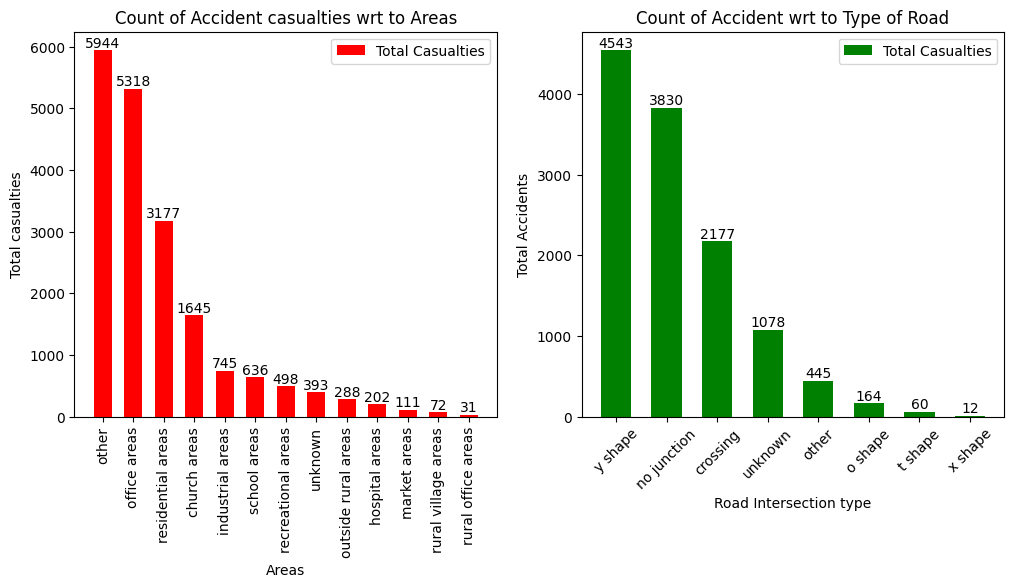

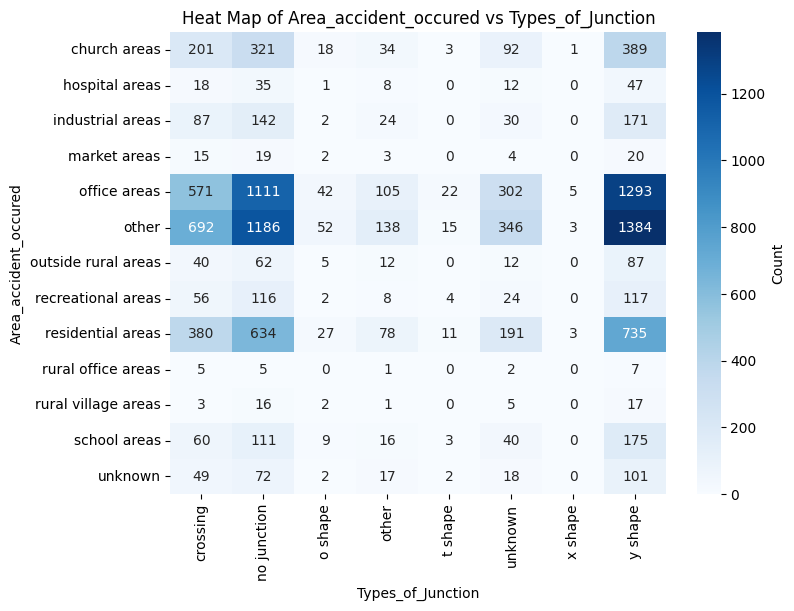

In [134]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,5))
df=cleaned_dataset.groupby("Area_accident_occured",as_index=False)['Number_of_casualties'].sum().sort_values(by="Number_of_casualties",ascending=False)
df1=cleaned_dataset.groupby("Types_of_Junction",as_index=False)['Number_of_casualties'].count().sort_values(by="Number_of_casualties",ascending=False)
df.head(10)
bar_width = 0.6
plt.subplot(1, 2, 1)
hdi_bar =plt.bar(df["Area_accident_occured"], df["Number_of_casualties"], width=bar_width, label='Total Casualties', color='red', align='center')
for bar in hdi_bar:
    death_cnt = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, death_cnt, str(death_cnt),
             ha='center', va='bottom')
plt.legend(loc='upper right')
plt.xlabel('Areas')
plt.xticks(rotation=90)
plt.ylabel('Total casualties')
plt.title('Count of Accident casualties wrt to Areas')
plt.legend()
plt.subplot(1, 2, 2)
hdi_bar =plt.bar(df1["Types_of_Junction"], df1["Number_of_casualties"], width=bar_width, label='Total Casualties', color='green', align='center')
for bar in hdi_bar:
    death_cnt = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, death_cnt, str(death_cnt),
             ha='center', va='bottom')
plt.legend(loc='upper right')
plt.xlabel('Road Intersection type')
plt.xticks(rotation=45)
plt.ylabel('Total Accidents')
plt.title('Count of Accident wrt to Type of Road')
plt.legend()
plt.show()

# Heat Map of Area_accident_occured vs Types_of_Junction
df = pd.DataFrame(cleaned_dataset)
distribution_table = df.pivot_table(index=df["Area_accident_occured"], columns=df["Types_of_Junction"], aggfunc='size', fill_value=0)
plt.figure(figsize=(8, 6))
sns.heatmap(distribution_table, annot=True, fmt='d', cmap='Blues', cbar_kws={'label': 'Count'})
plt.title('Heat Map of Area_accident_occured vs Types_of_Junction')
plt.xlabel('Types_of_Junction')
plt.ylabel('Area_accident_occured')
plt.show()



*   'Type_of_vehicle vs Area_accident_occured' distribution helps us understand the movement of different type of vehicles in a area and adressing to the issues faced by them.
*   From the map 'Area_accident_occured vs Type_of_collision' most common acident type is vehicle on vehicle collision, it can be seen across all the area.Followed by hitting roadside objects and pedestrians in office and residential area.

*   Significant casualties are seen by Rollover in office area.






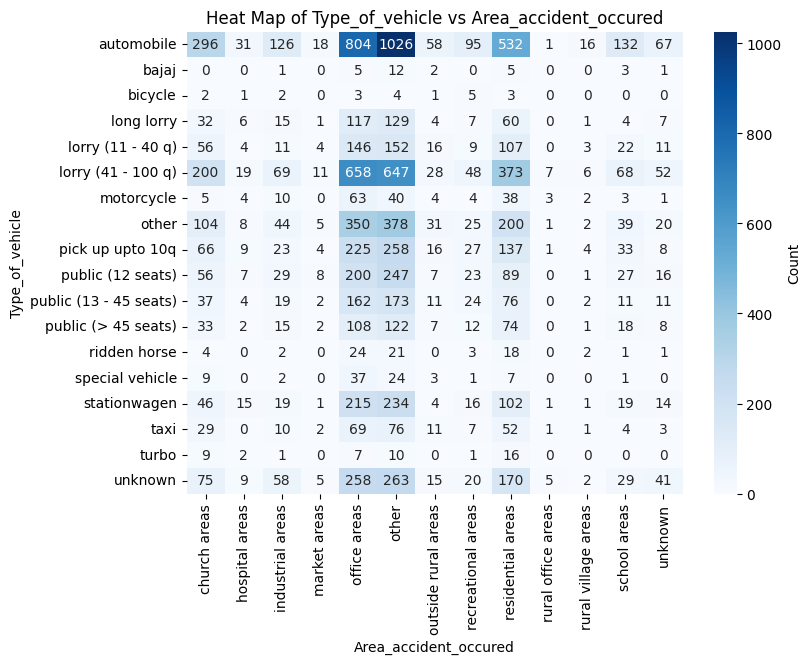

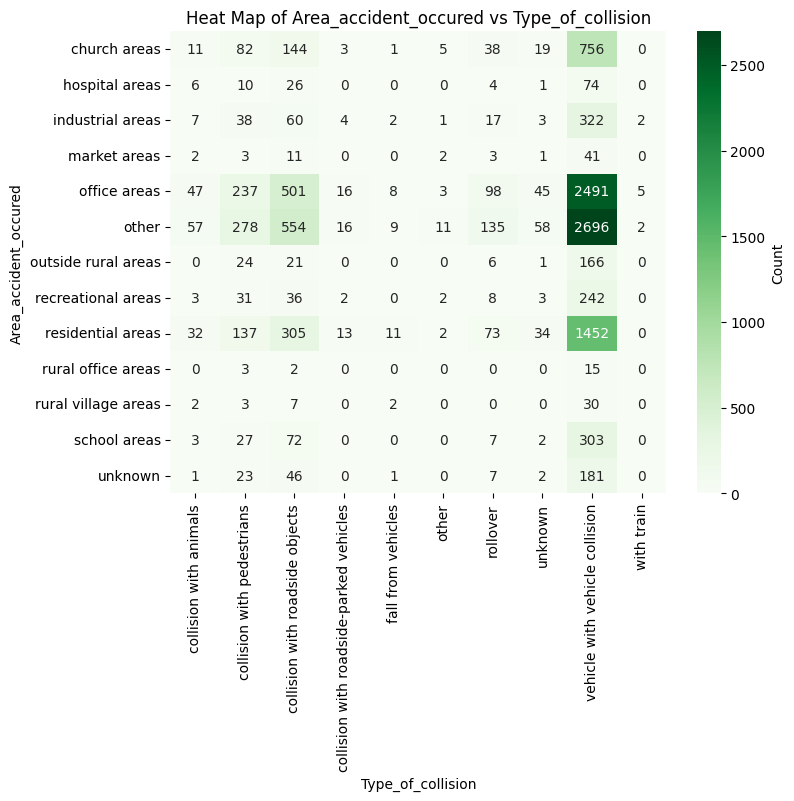

In [135]:
# Heat Map of Type_of_vehicle vs Area_accident_occured
df = pd.DataFrame(cleaned_dataset)
distribution_table = df.pivot_table(index=df["Type_of_vehicle"], columns=df["Area_accident_occured"], aggfunc='size', fill_value=0)
plt.figure(figsize=(8, 6))
sns.heatmap(distribution_table, annot=True, fmt='d', cmap='Blues', cbar_kws={'label': 'Count'})
plt.title('Heat Map of Type_of_vehicle vs Area_accident_occured')
plt.xlabel('Area_accident_occured')
plt.ylabel('Type_of_vehicle')
plt.show()


# Heat Map of Area_accident_occured vs Type_of_collision
df = pd.DataFrame(cleaned_dataset)
distribution_table = df.pivot_table(index=df["Area_accident_occured"], columns=df["Type_of_collision"], aggfunc='size', fill_value=0)
plt.figure(figsize=(8, 6))
sns.heatmap(distribution_table, annot=True, fmt='d', cmap='Greens', cbar_kws={'label': 'Count'})
plt.title('Heat Map of Area_accident_occured vs Type_of_collision')
plt.xlabel('Type_of_collision')
plt.ylabel('Area_accident_occured')
plt.show()

Hypothesis 2: Studying Road Alignments, Junctions, causes of accidents and their correlation.
Lane Markings at accident location distribution
*   We can see that two way undivided roads and two way road divided with broken lines has higher percent of errors. This helps to understand driving patterns and designing road with proper medians

Heat Map of Cause_of_accident vs Lanes_or_Medians
*   On Double carriageway, we see accidents due to lane changing and overspeeding
*   For Two way roads with overtake allowed, high number of accidents are seen during overtaking and not giving priority to other vehicle or pedestrain

*   High accidents are seen when no distance is kepet between vehicles and moving backwards on road. Measures should be taken to avoid such irresponsible driving

Heat Map of Road_allignment vs Types_of_Junction

*   Apart from flat teraain, combination of steep downward grade on mountainous terrain with y-Shape junction sees 161 accidents, similar with tangent roads on moutainous terrain.

Heat Map of Lanes_or_Medians vs Types_of_Junction


*  This map helps us understand the junctions and lane structure at accident spot,one way combination with Y-shape,crossing,no junction have higher accident rates.

Heat Map of Vehicle_movement vs Type_of_collision

*   For highest category of collisions i.e. vehicle to vehicle collisions we see the actual reason and count of collision from above heat map.
*   Moving backward, reversing , turnover account, Entering junction for accident along with straight on hitting








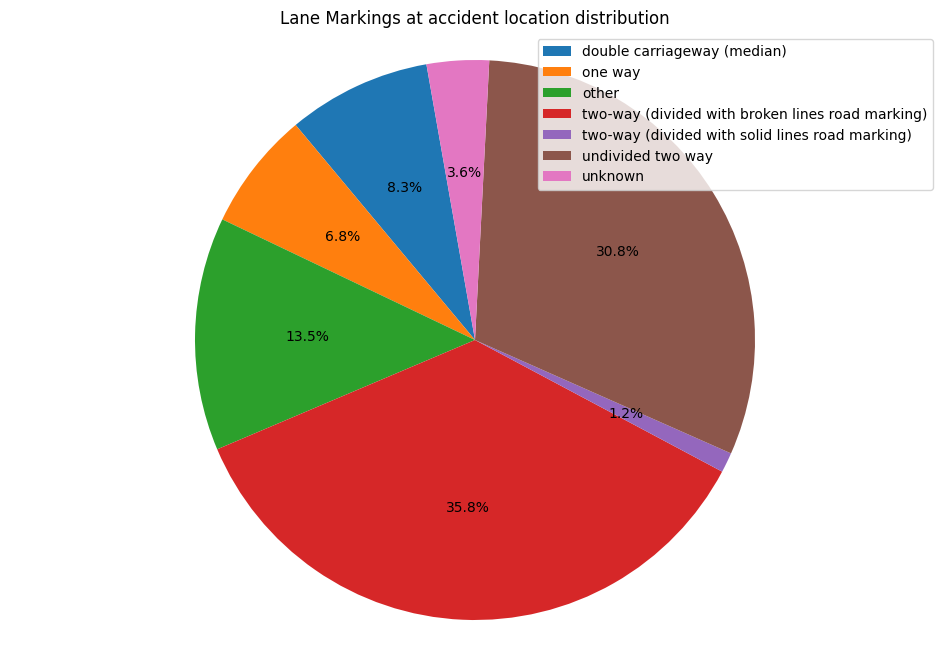

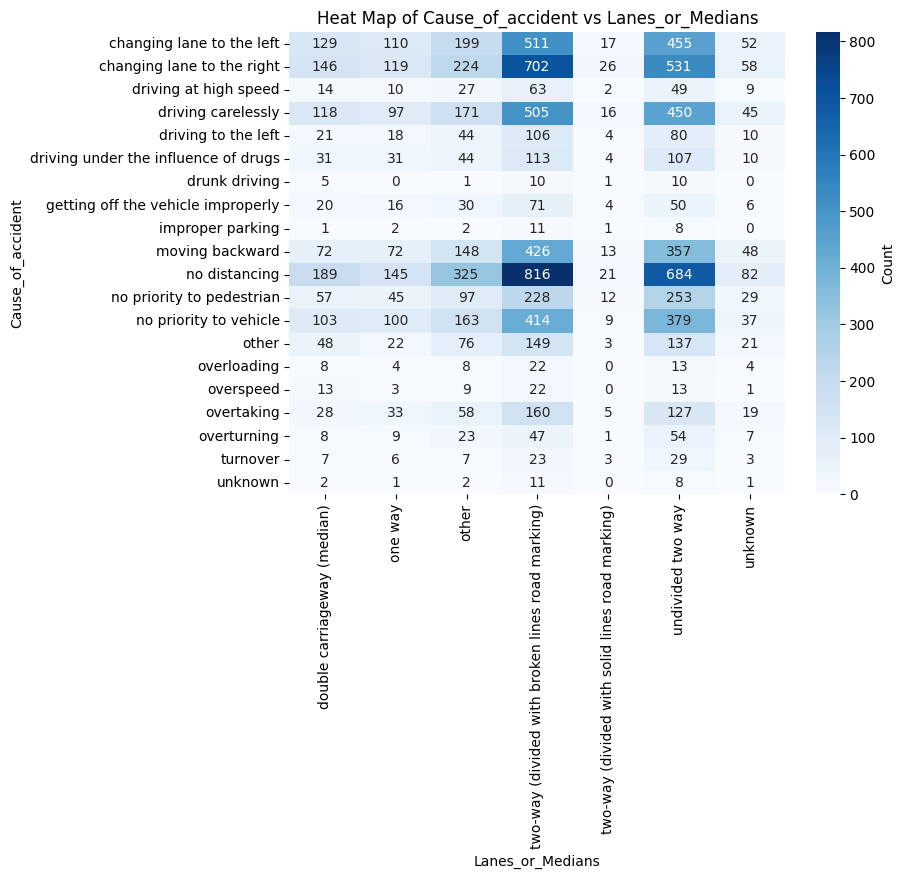

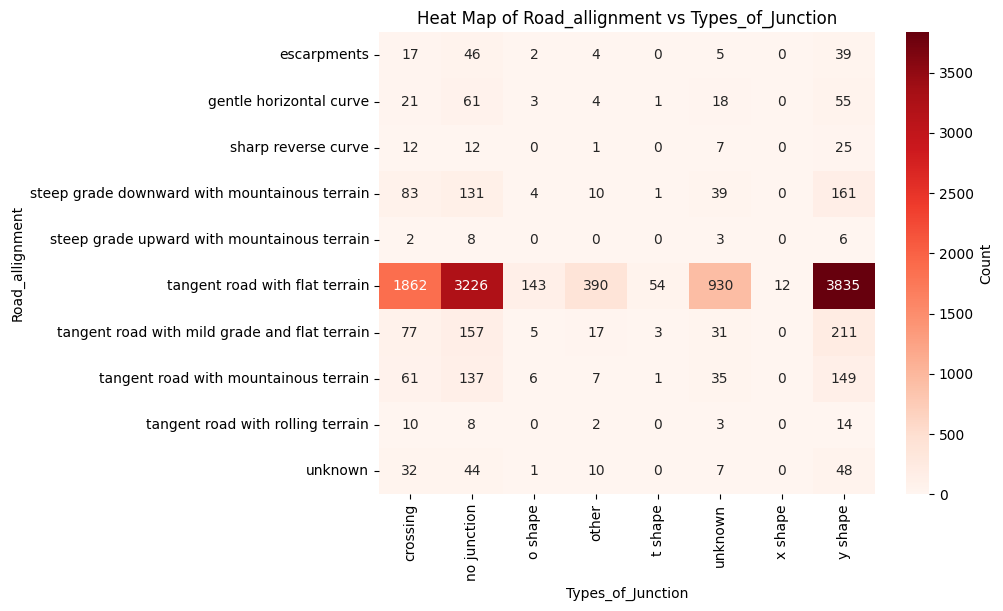

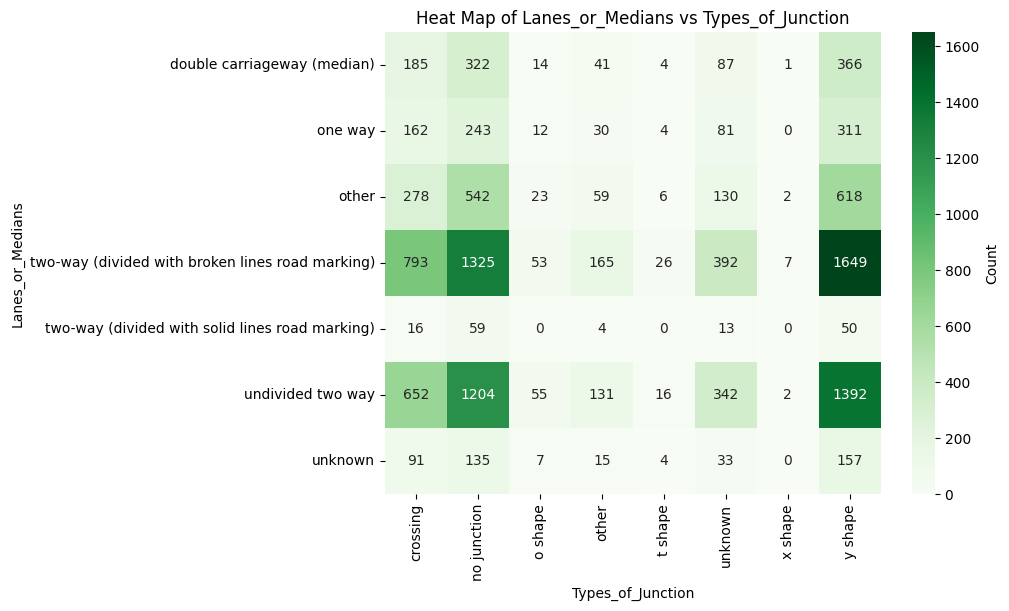

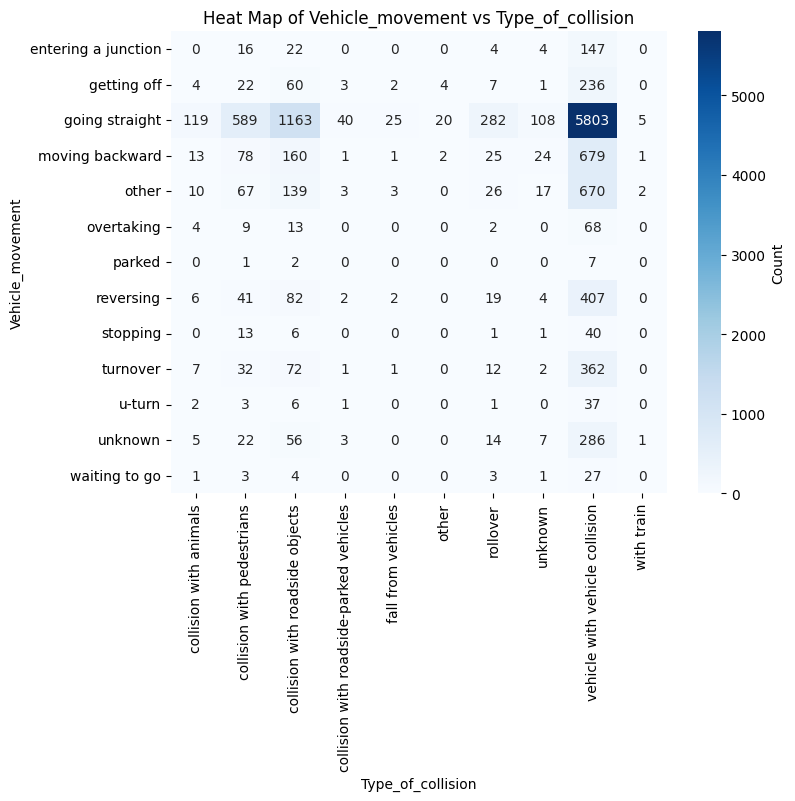

In [136]:
# Lane Markings at accident location distribution
df=cleaned_dataset.groupby("Lanes_or_Medians",as_index=False)["Number_of_casualties"].count()
plt.figure(figsize=(12, 8))
plt.pie(df['Number_of_casualties'], autopct='%1.1f%%', startangle=100)
plt.title('Lane Markings at accident location distribution')
plt.legend(df['Lanes_or_Medians'], loc='upper right')
plt.axis('equal')
plt.show()

# Heat Map of Cause_of_accident vs Lanes_or_Medians
df = pd.DataFrame(cleaned_dataset)
distribution_table = df.pivot_table(index=df["Cause_of_accident"], columns=df["Lanes_or_Medians"], aggfunc='size', fill_value=0)
plt.figure(figsize=(8, 6))
sns.heatmap(distribution_table, annot=True, fmt='d', cmap='Blues', cbar_kws={'label': 'Count'})
plt.title('Heat Map of Cause_of_accident vs Lanes_or_Medians')
plt.xlabel('Lanes_or_Medians')
plt.ylabel('Cause_of_accident')
plt.show()

# Heat Map of Road_allignment vs Types_of_Junction
df = pd.DataFrame(cleaned_dataset)
distribution_table = df.pivot_table(index=df["Road_allignment"], columns=df["Types_of_Junction"], aggfunc='size', fill_value=0)
plt.figure(figsize=(8, 6))
sns.heatmap(distribution_table, annot=True, fmt='d', cmap='Reds', cbar_kws={'label': 'Count'})
plt.title('Heat Map of Road_allignment vs Types_of_Junction')
plt.xlabel('Types_of_Junction')
plt.ylabel('Road_allignment')
plt.show()

# Heat Map of Lanes_or_Medians vs Types_of_Junction
df = pd.DataFrame(cleaned_dataset)
distribution_table = df.pivot_table(index=df["Lanes_or_Medians"], columns=df["Types_of_Junction"], aggfunc='size', fill_value=0)
plt.figure(figsize=(8, 6))
sns.heatmap(distribution_table, annot=True, fmt='d', cmap='Greens', cbar_kws={'label': 'Count'})
plt.title('Heat Map of Lanes_or_Medians vs Types_of_Junction')
plt.xlabel('Types_of_Junction')
plt.ylabel('Lanes_or_Medians')
plt.show()


# Heat Map of Vehicle_movement vs Type_of_collision
df = pd.DataFrame(cleaned_dataset)
distribution_table = df.pivot_table(index=df["Vehicle_movement"], columns=df["Type_of_collision"], aggfunc='size', fill_value=0)
plt.figure(figsize=(8, 6))
sns.heatmap(distribution_table, annot=True, fmt='d', cmap='Blues', cbar_kws={'label': 'Count'})
plt.title('Heat Map of Vehicle_movement vs Type_of_collision')
plt.xlabel('Type_of_collision')
plt.ylabel('Vehicle_movement')
plt.show()



**Question 2:**

**Analysis of impact of Environmental factors, Light(visibility) impact, Road surface, time of the day, etc on driving skills**

Hypothesis 1 : Analysing the Accident patterns over days of week and different times of the day.
Count of Accident casualties wrt to Time of Day


*   We see highest number of accidents in evening period which is same as end of office hours. Followed by Night time.
*   Number of Early Morning and Midnight accidents are very less.


Count of Accident wrt Days of week
*   We see the count of accident per week day. We see on Weekends there is significant less count as compared to week days.
*   Office areas count for more accidents, significant from this data of weekdays.

Heat Map of Day_of_week vs Area_accident_occured

*   Office area has less accident on weekends
*   same trend is visible for Residential and Industrial areas indicating less activity


*   For Church area we see high numbers especially for friday

Road surface distribution


*   From this we can say that most of the roads are made of Asphalt these days. Apart from that we can see earth roads and gravel roads as well



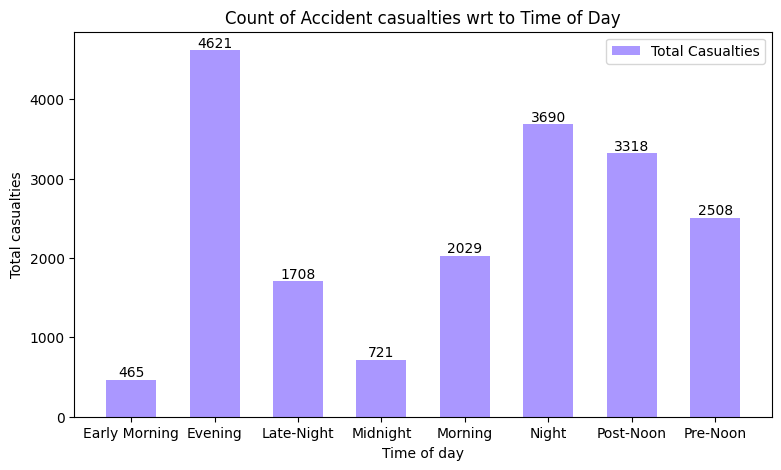

In [137]:
def categorize_time_of_dayby3(hour):
    if 3<= hour < 6:
        return 'Early Morning'
    elif 6 <= hour < 9:
        return 'Morning'
    elif 9 <= hour < 12:
        return 'Pre-Noon'
    elif 12 <= hour < 15:
        return 'Post-Noon'
    elif 15 <= hour < 18:
        return 'Evening'
    elif 18 <= hour < 21:
        return 'Night'
    elif 21 <= hour < 24:
        return 'Late-Night'
    else:
        return 'Midnight'

df_new=cleaned_dataset
df_new['Time_of_day_3'] = df_new['Hour'].apply(categorize_time_of_dayby3)

plt.figure(figsize=(9,5))
df=df_new.groupby("Time_of_day_3",as_index=False)['Number_of_casualties'].sum()
#df1=cleaned_dataset.groupby("Types_of_Junction",as_index=False)['Number_of_casualties'].count().sort_values(by="Number_of_casualties",ascending=False)
df.head(10)
bar_width = 0.6
hdi_bar =plt.bar(df["Time_of_day_3"], df["Number_of_casualties"], width=bar_width, label='Total Casualties', color='#AA97FF', align='center')
for bar in hdi_bar:
    death_cnt = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, death_cnt, str(death_cnt),
             ha='center', va='bottom')
plt.legend(loc='upper right')
plt.xlabel('Time of day')
plt.ylabel('Total casualties')
plt.title('Count of Accident casualties wrt to Time of Day')
plt.legend()

<Figure size 800x500 with 0 Axes>

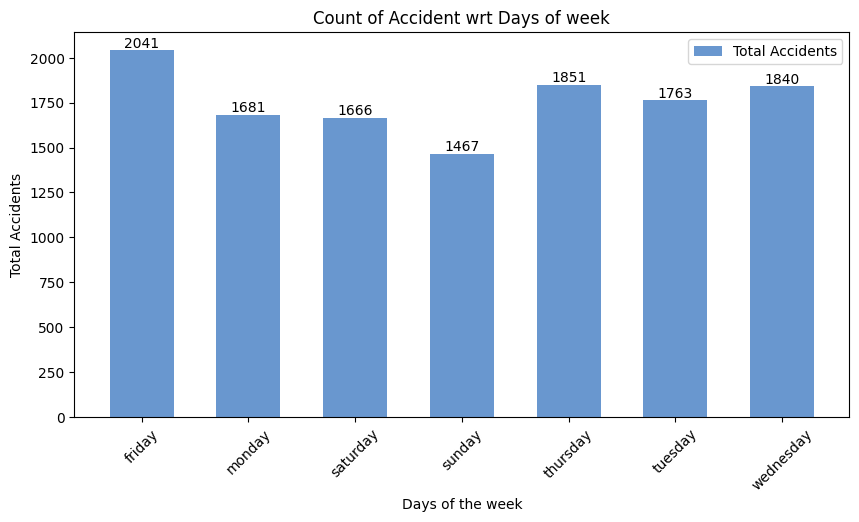

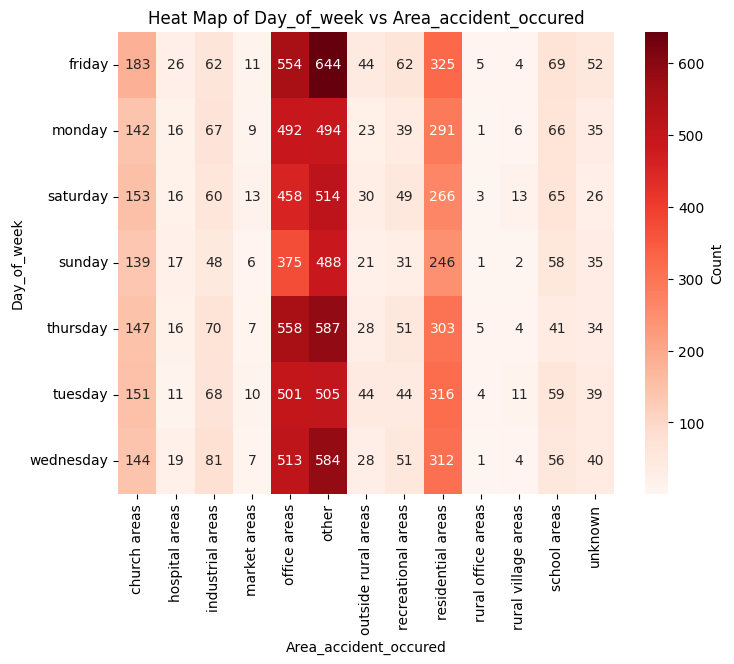

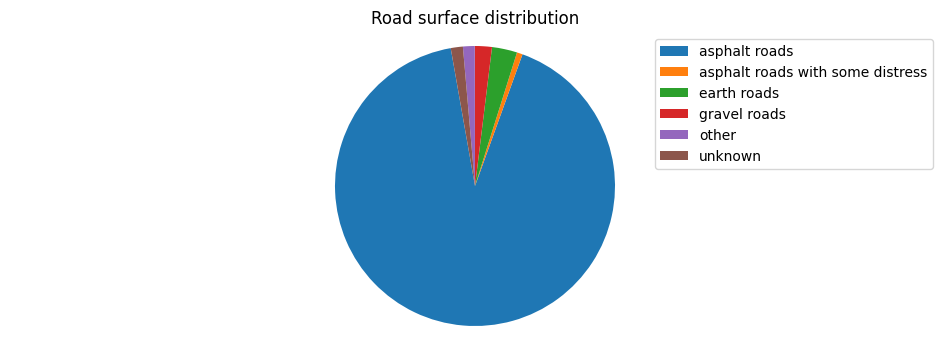

In [138]:
plt.figure(figsize=(8, 5))
df3=cleaned_dataset.groupby("Day_of_week",as_index=False)['Number_of_casualties'].count()
plt.figure(figsize=(10, 5))
bar_width = 0.6
hdi_bar =plt.bar(df3["Day_of_week"], df3["Number_of_casualties"], width=bar_width, label='Total Accidents', color='#6997CF', align='center')
for bar in hdi_bar:
    death_cnt = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, death_cnt, str(death_cnt),
             ha='center', va='bottom')
plt.legend(loc='upper right')
plt.xlabel('Days of the week')
plt.xticks(rotation=45)
plt.ylabel('Total Accidents')
plt.title('Count of Accident wrt Days of week')
plt.legend()
plt.show()

# Heat Map of Day_of_week vs Area_accident_occured
df = pd.DataFrame(cleaned_dataset)
distribution_table = df.pivot_table(index=df["Day_of_week"], columns=df["Area_accident_occured"], aggfunc='size', fill_value=0)
plt.figure(figsize=(8, 6))
sns.heatmap(distribution_table, annot=True, fmt='d', cmap='Reds', cbar_kws={'label': 'Count'})
plt.title('Heat Map of Day_of_week vs Area_accident_occured')
plt.xlabel('Area_accident_occured')
plt.ylabel('Day_of_week')
plt.show()

df=cleaned_dataset.groupby("Road_surface_type",as_index=False)["Number_of_casualties"].count()
df.head(10)
# Pie Chart
plt.figure(figsize=(12, 4))
plt.pie(df['Number_of_casualties'], startangle=100)
plt.title('Road surface distribution')
plt.legend(df['Road_surface_type'], loc='upper right')
plt.axis('equal')
plt.show()


Hypothesis 2: Understanding impact of light conditions on driving conditions through type of accidents, reason for accidents, weather condition

Heat Map of Light_conditions vs Weather_conditions

*   Apart from Normal weather, Change in conditions like Raining, Cloudy, Snowy, Windy have impact on accidents. Amplifying more with Lighting conditions

Heat Map of Cause_of_accident vs Light_conditions


*   Movement of vehicle is difficult to track in vehicle light and areas with no lighting. Count signifies the importance of properly-lit streets.






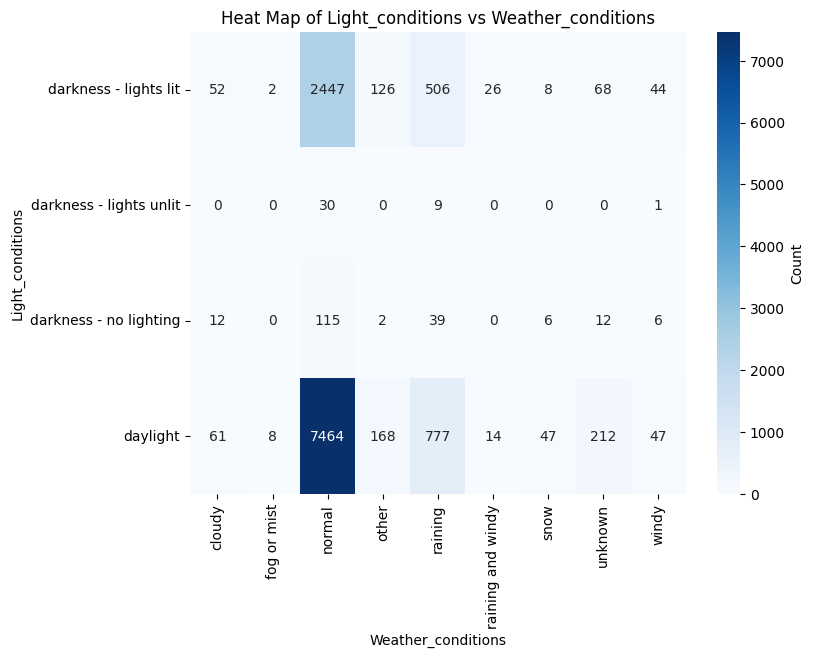

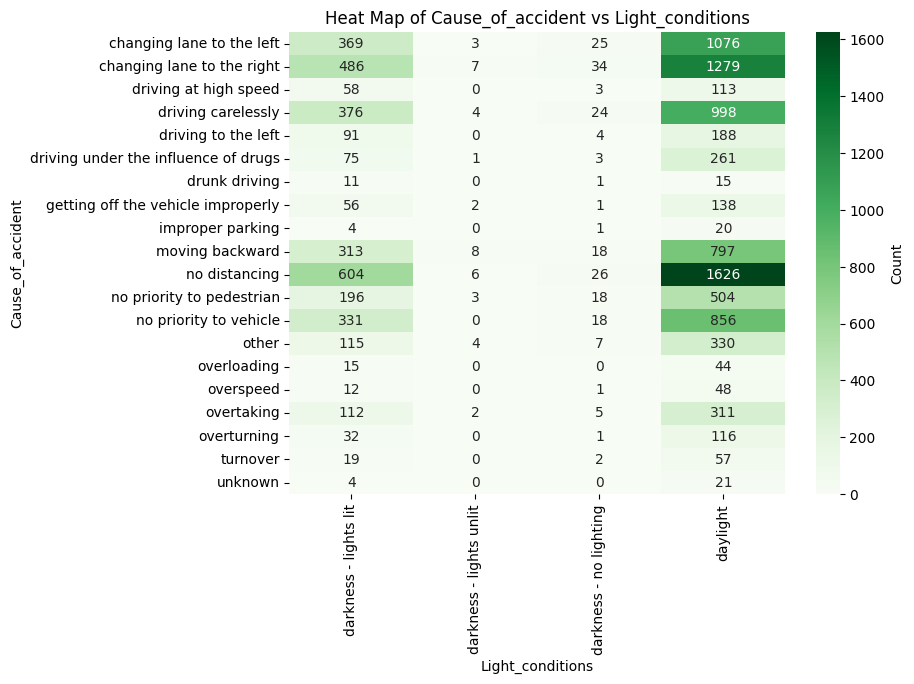

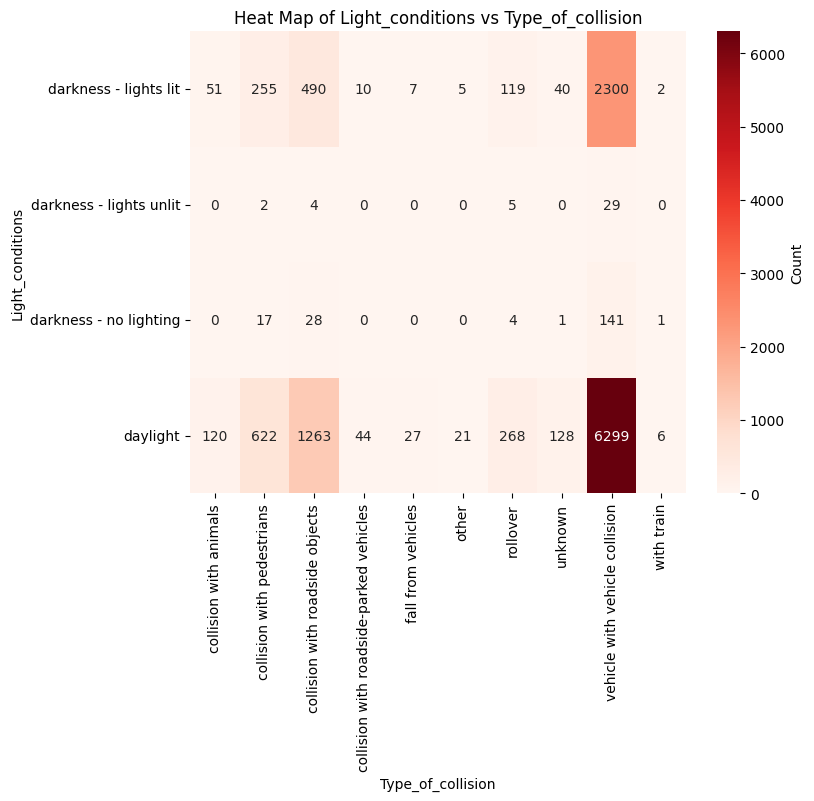

In [139]:
#light conditions impact
# Heat Map of Light_conditions vs Weather_conditions
df = pd.DataFrame(cleaned_dataset)
distribution_table = df.pivot_table(index=df["Light_conditions"], columns=df["Weather_conditions"], aggfunc='size', fill_value=0)
plt.figure(figsize=(8, 6))
sns.heatmap(distribution_table, annot=True, fmt='d', cmap='Blues', cbar_kws={'label': 'Count'})
plt.title('Heat Map of Light_conditions vs Weather_conditions')
plt.xlabel('Weather_conditions')
plt.ylabel('Light_conditions')
plt.show()

# Heat Map of Cause_of_accident vs Light_conditions
df = pd.DataFrame(cleaned_dataset)
distribution_table = df.pivot_table(index=df["Cause_of_accident"], columns=df["Light_conditions"], aggfunc='size', fill_value=0)
plt.figure(figsize=(8, 6))
sns.heatmap(distribution_table, annot=True, fmt='d', cmap='Greens', cbar_kws={'label': 'Count'})
plt.title('Heat Map of Cause_of_accident vs Light_conditions')
plt.xlabel('Light_conditions')
plt.ylabel('Cause_of_accident')
plt.show()

# Heat Map of Light_conditions vs Type_of_collision
df = pd.DataFrame(cleaned_dataset)
distribution_table = df.pivot_table(index=df["Light_conditions"], columns=df["Type_of_collision"], aggfunc='size', fill_value=0)
plt.figure(figsize=(8, 6))
sns.heatmap(distribution_table, annot=True, fmt='d', cmap='Reds', cbar_kws={'label': 'Count'})
plt.title('Heat Map of Light_conditions vs Type_of_collision')
plt.xlabel('Type_of_collision')
plt.ylabel('Light_conditions')
plt.show()

Hypothesis 2: Understanding impact of Weather conditions on driving conditions through type of accidents, reason for accidents, weather condition


Heat Map of Vehicle_movement vs Weather_conditions


*   Bad Driving practices amplify with non normal environment conditions. we can see that from map.



Heat Map of Weather_conditions vs Type_of_collision


*   Lack of proper lighting has resulted in collision with pedestrians and also road side objects.
*   Even under car lights we see some accidents, suggesting improvement in lighting of certain areas



Heat Map of Cause_of_accident vs Weather_conditions


*   Climatic conditions lead drivers to induce mistakes due to lack of clear vision, less road surface grip and lower control over vehicle
*   We see rain and fog have induced driving errors from the distribution



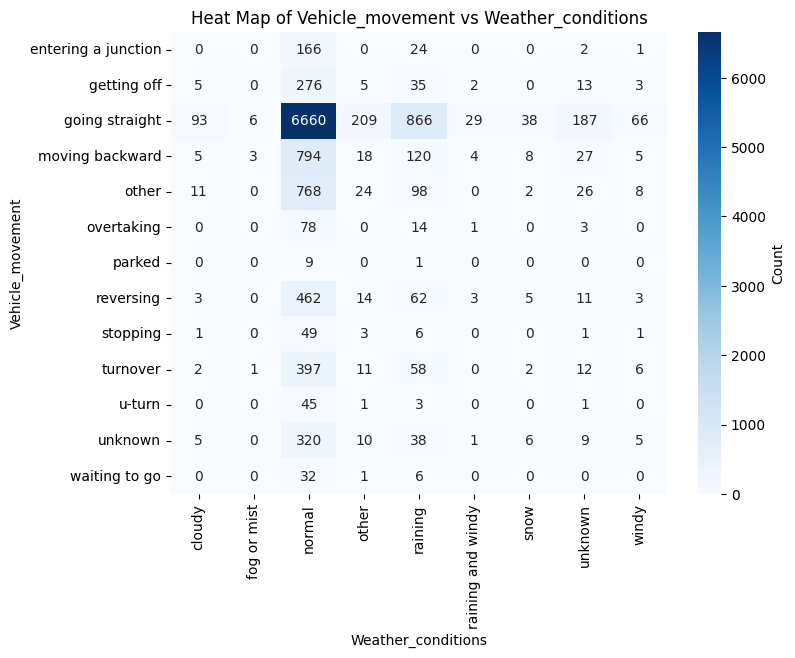

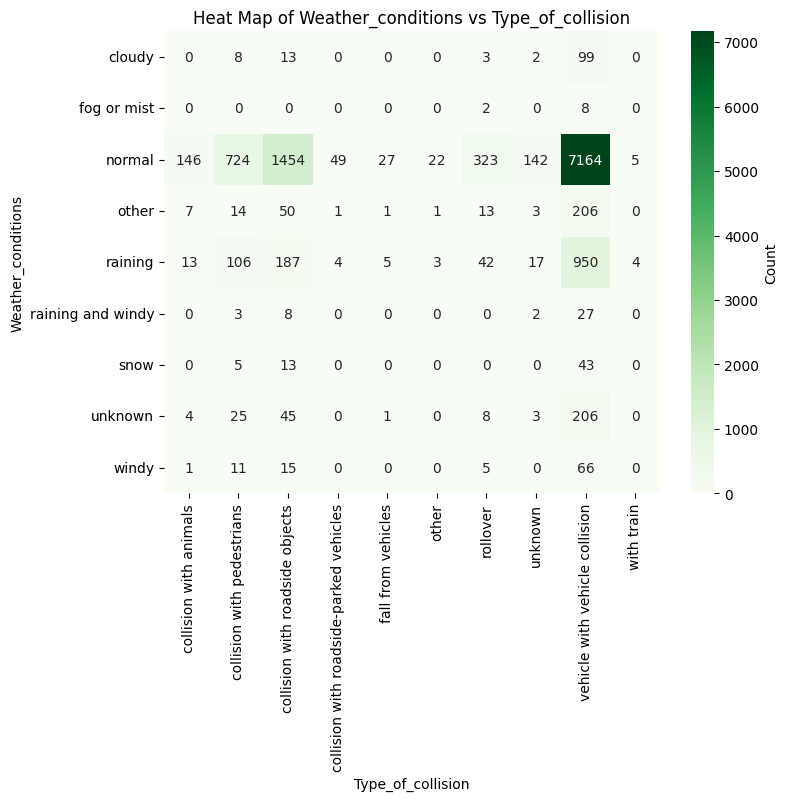

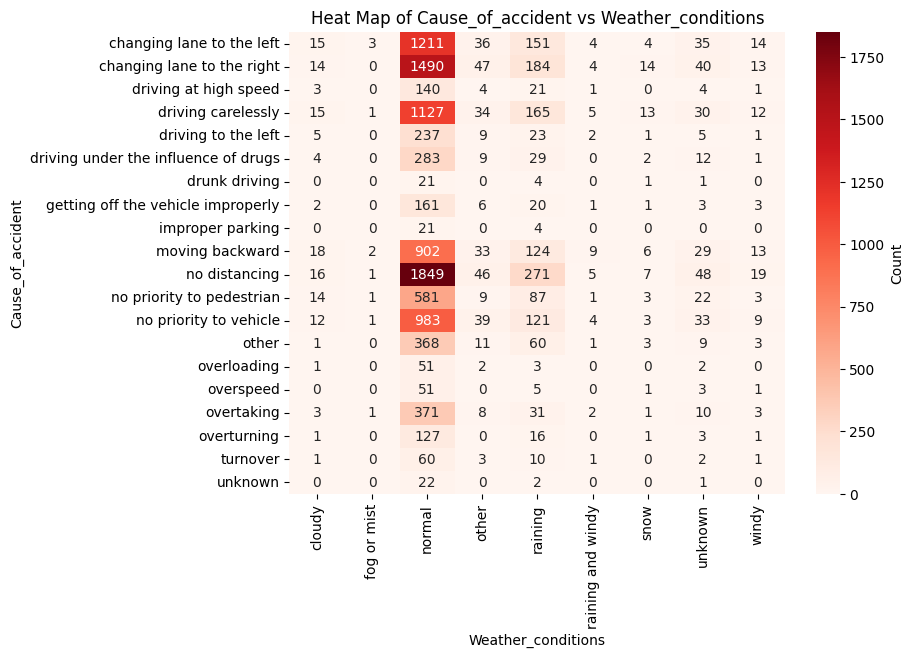

In [140]:
# Distribution of  details with Weather_conditions
#Heat Map of Vehicle_movement vs Weather_conditions
df = pd.DataFrame(cleaned_dataset)
distribution_table = df.pivot_table(index=df["Vehicle_movement"], columns=df["Weather_conditions"], aggfunc='size', fill_value=0)
plt.figure(figsize=(8, 6))
sns.heatmap(distribution_table, annot=True, fmt='d', cmap='Blues', cbar_kws={'label': 'Count'})
plt.title('Heat Map of Vehicle_movement vs Weather_conditions')
plt.xlabel('Weather_conditions')
plt.ylabel('Vehicle_movement')
plt.show()

#Heat Map of Weather_conditions vs Type_of_collision
df = pd.DataFrame(cleaned_dataset)
distribution_table = df.pivot_table(index=df["Weather_conditions"], columns=df["Type_of_collision"], aggfunc='size', fill_value=0)
plt.figure(figsize=(8, 6))
sns.heatmap(distribution_table, annot=True, fmt='d', cmap='Greens', cbar_kws={'label': 'Count'})
plt.title('Heat Map of Weather_conditions vs Type_of_collision')
plt.xlabel('Type_of_collision')
plt.ylabel('Weather_conditions')
plt.show()

# Heat Map of Cause_of_accident vs Weather_conditions
df = pd.DataFrame(cleaned_dataset)
distribution_table = df.pivot_table(index=df["Cause_of_accident"], columns=df["Weather_conditions"], aggfunc='size', fill_value=0)
plt.figure(figsize=(8, 6))
sns.heatmap(distribution_table, annot=True, fmt='d', cmap='Reds', cbar_kws={'label': 'Count'})
plt.title('Heat Map of Cause_of_accident vs Weather_conditions')
plt.xlabel('Weather_conditions')
plt.ylabel('Cause_of_accident')
plt.show()